## Making sections in ECCO data using oceanspy

### Fig 3 for Siddiqui et al 


In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize': '24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [5]:
od = ospy.open_oceandataset.from_catalog('ECCO')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


In [6]:
od.dataset.nbytes * 1.0e-9

145.518932476

In [7]:
od.dataset

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/42)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

## drop unnecesary variables (k's)

In [8]:
_ds = od._ds.drop({'k', 'k_p1','k_u', 'k_l'})
_ds = od._ds.drop_dims({'nv'})
od._ds = _ds

In [9]:
od.grid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   Y --> left
  * left     Yp1 --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
X Axis (not periodic, boundary=None):
  * center   X --> left
  * left     Xp1 --> center
time Axis (not periodic, boundary=None):
  * center   time_midp --> outer
  * outer    time --> center

In [10]:
%%time
## Parameters




## Parameters
varList = ['SALT']
YRange = [0,90] # degrees latitude
XRange = [-60, -2.5] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = None
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False
## Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'



## Carrying out the cutout
cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                                   ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes,
                                   centered=centered)

Cutting out the oceandataset.
faces in the cutout [1, 2, 6, 10, 11]
CPU times: user 13.2 s, sys: 477 ms, total: 13.7 s
Wall time: 14.3 s


In [11]:
cut_od.dataset.nbytes * 1e-9

0.8372942800000001

In [12]:
cut_od._ds

<xarray.Dataset>
Dimensions:    (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50, time_midp: 311,
                X: 88, Xp1: 89, Y: 148, Yp1: 149)
Coordinates: (12/18)
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl         (Zl) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    ...         ...
    YC         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(149, 89), meta=np.ndarray>
    YU         (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    XU         (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    YV         (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
    XV         (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
Data variables: (12/27)
    SALT       (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 148, 88), meta=np.ndarray>
    CS         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    ...         ...
    maskW      (Z, Y, Xp1) float64 dask.array<chunksize=(50, 148, 89), meta=np.ndarray>
    rA         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    rAs        (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
    rAw        (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    rAz        (Yp1, Xp1) float32 dask.array<chunksize=(149, 89), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

In [13]:
# Masking the depth
#cut_od._ds = cut_od._ds.where(cut_od._ds.Depth>0)
cut_od._ds['Depth_masked'] = cut_od._ds['Depth']
depth_masked = cut_od._ds['Depth_masked']
depth_masked = depth_masked.where(depth_masked>0)
cut_od._ds['Depth_masked'] = depth_masked

## Making sections for OVIDE, ELLET

Spatial information for the lines could simply be input after opening the datafiles on Sciserver.

In [14]:
# opening files from CCHDO https://cchdo.ucsd.edu/
ds_ovide = xr.open_dataset('data/ovide_2016_CTDO2.nc') 

In [15]:
ds_ovide

<xarray.Dataset>
Dimensions:                   (N_PARAM: 25, N_PROF: 136, N_LEVELS: 5445,
                               N_PARAM_CHIM: 9, N_BOTTLES: 28)
Dimensions without coordinates: N_PARAM, N_PROF, N_LEVELS, N_PARAM_CHIM,
                                N_BOTTLES
Data variables: (12/129)
    STATION_PARAMETER         (N_PARAM) |S4 ...
    SHIP_NAME                 (N_PROF) |S30 ...
    SHIP_WMO_ID               (N_PROF) |S16 ...
    PI_NAME                   (N_PROF) |S64 ...
    PI_ORGANISM               (N_PROF) |S16 ...
    CRUISE_NAME               (N_PROF) |S16 ...
    ...                        ...
    CHTMPOB_RESP              (N_PROF) object ...
    CHTMPOB_RESP_ORG          (N_PROF) object ...
    CHTMPOB_PREC              (N_PROF) float32 ...
    CHOXYKPD                  (N_PROF, N_BOTTLES) float32 ...
    CHOXYLPD                  (N_PROF, N_BOTTLES) float32 ...
    CHOXYKBD_QC               (N_PROF, N_BOTTLES) float32 ...
Attributes: (12/17)
    Data_type:             CTD
    Format_version:        MLT 1.0-2014
    Reference_date_time:   19500101000000
    Reference_param:       PRES
    Project_name:          OVIDE
    Date_creation:         20170703172159
    ...                    ...
    North_latitude:        63.41648
    West_longitude:        -43.07546
    East_longitude:        -9.4641
    Coord_system:          GEOGRAPHICAL-WGS84
    Data_level:            L2B
    CHEMISTRY_PARAMETERS:  Y

In [17]:
## OVIDE information 
lats_ovide = np.flip(ds_ovide.LATITUDE[0:95].values)

lons_ovide =  np.flip(ds_ovide.LONGITUDE[0:95].values)

depth_ovide = [0, -5346]


# Extract ship survey and fields used by this notebook
od_surv_ovide = cut_od.subsample.survey_stations(
    Xsurv=lons_ovide,
    Ysurv=lats_ovide,
    ZRange=depth_ovide,
    varList=[ 'SALT']
)


Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


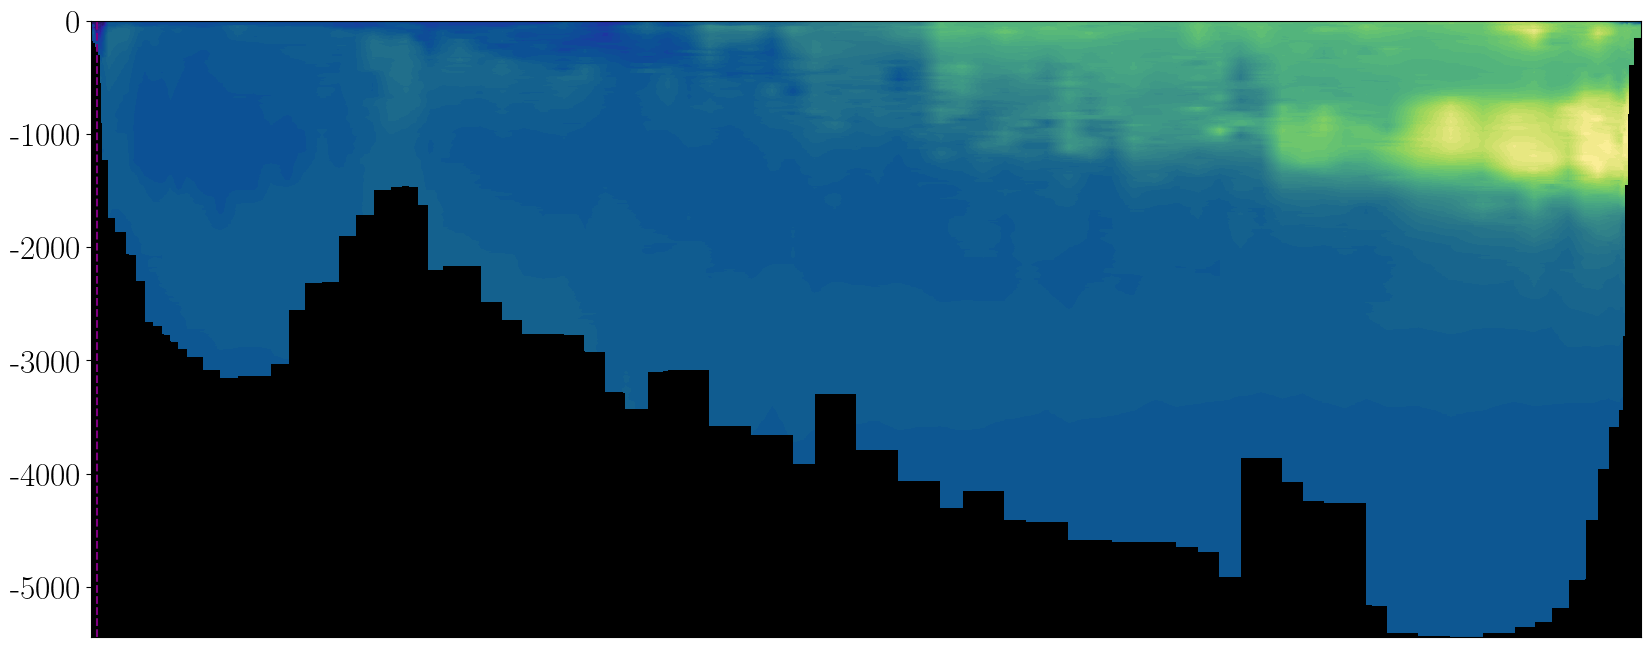

In [18]:
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
#levels_salt_ovide = np.linspace(34.5,ds_ovide.ctd_salinity.max(),50)
levels_salt_ovide = np.linspace(34.5,ds_ovide.PSAL.max(),50)

c0=ax1.contourf(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
                levels_salt_ovide, cmap=cmocean.cm.haline, extend='both')

ax1.invert_yaxis()
ax1.set_xticks([])

ax1.set_yticks([0,1000,2000,3000,4000,5000])
ax1.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])
ax1.set_facecolor('black')
#ax1.set_title('OVIDE line (Winter 1994)')
#ax1.set_ylabel('[Depth]')
ax1.vlines([15], 0, 1, transform=ax1.get_xaxis_transform(),color='purple',linestyle='dashed')


In [19]:
od_surv_ovide._ds = od_surv_ovide._ds.where(od_surv_ovide._ds.SALT>34)

In [20]:
od_surv_ovide._ds.SALT.sel(time='2016-06', Z=slice(None,-200)).isel(station=slice(30,-30)).mean(dim={'Z','station'}).values

array([35.19036], dtype=float32)

In [21]:
ds_ovide.PSAL[30:95-30,0:200].mean()

<xarray.DataArray 'PSAL' ()>
array(35.148907, dtype=float32)

Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


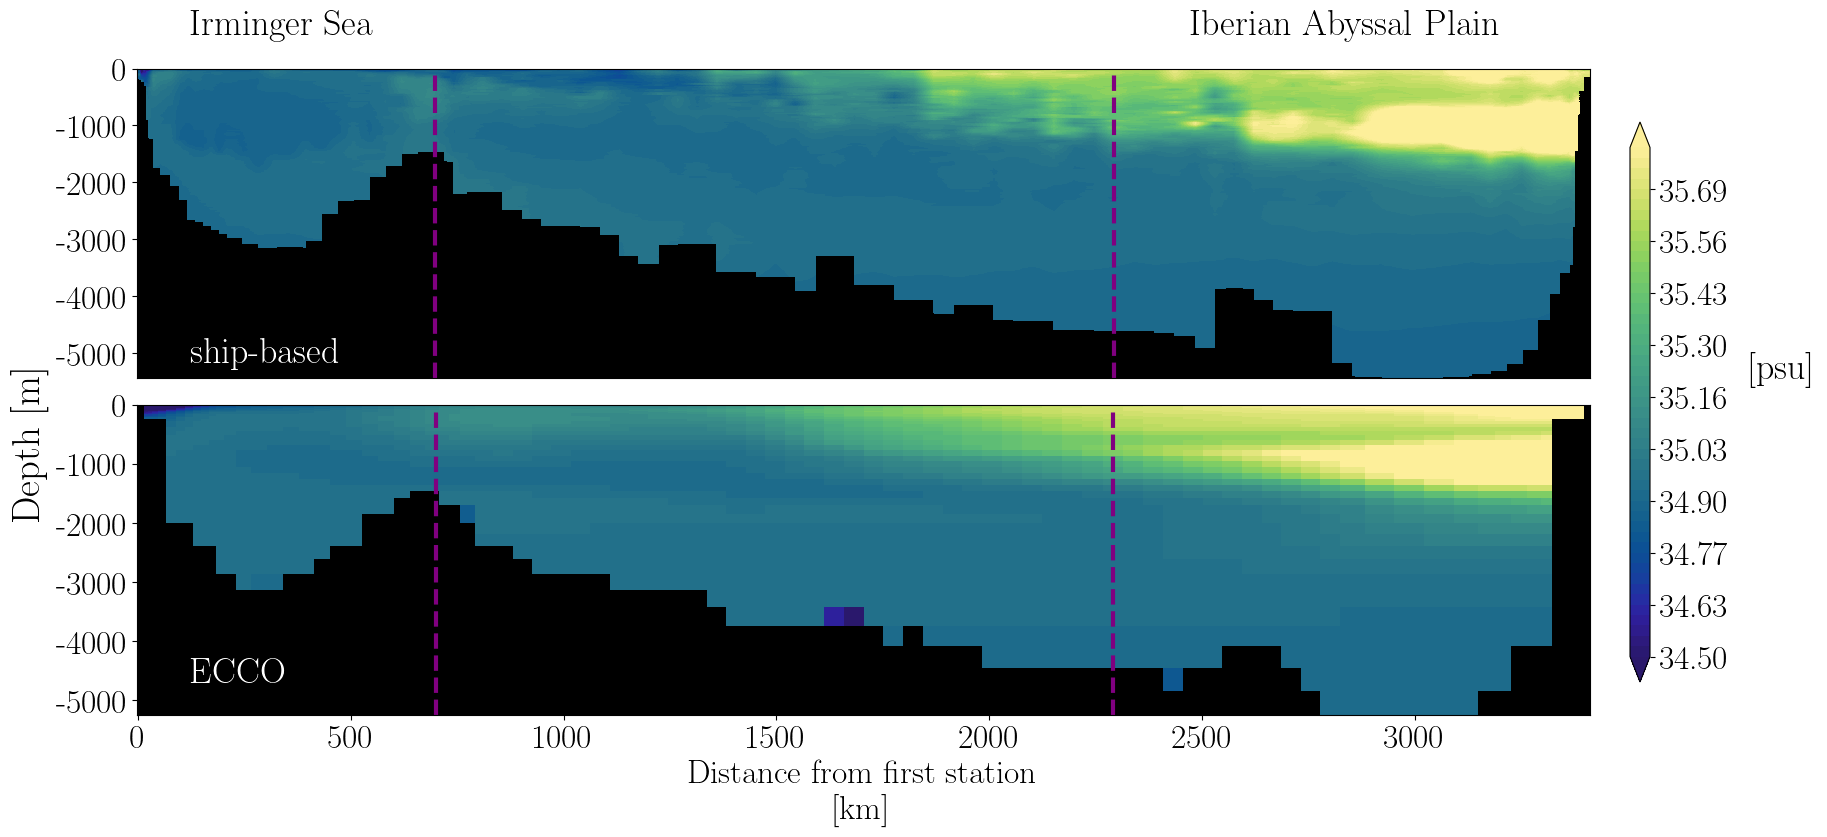

In [22]:
# Create subplots
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)

#levels_salt_ovide = np.linspace(34.5,ds_ovide.ctd_salinity.max(),50)
levels_salt_ovide = np.linspace(34.5,35.8,50)

c0=ax1.contourf(od_surv_ovide._ds['station_dist'], np.flip(ds_ovide.PARAM_REF), np.flip(ds_ovide.PSAL[0:95].transpose()),
                levels_salt_ovide, cmap=cmocean.cm.haline, extend='both')

ax1.invert_yaxis()
ax1.set_xticks([])

ax1.set_yticks([0,1000,2000,3000,4000,5000])
ax1.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])
ax1.set_facecolor('black')
#ax1.set_title('OVIDE line (Winter 1994)')
#ax1.set_ylabel('[Depth]')

ax2 = od_surv_ovide.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':'2016-06'},
    levels=levels_salt_ovide,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    ax=ax2)

ax2.vlines([700], 0, 1, transform=ax2.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax1.vlines([700], 0, 1, transform=ax1.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax2.vlines([2290], 0, 1, transform=ax2.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    
ax1.vlines([2290], 0, 1, transform=ax1.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)    

ax2.patch.set_facecolor('black')
ax2.set_ylabel(None)

ax2.set_yticks([0,-1000,-2000,-3000,-4000,-5000])
ax2.set_yticklabels(['0','-1000','-2000','-3000','-4000','-5000'])

plt.figtext(0.88,0.58, '[psu]', fontsize=26)

plt.figtext(0.1,0.2, 'ECCO', color='w', fontsize=26)
plt.figtext(0.1,0.6, 'ship-based', color='w',fontsize=26)
plt.figtext(0.6,1.01, 'Iberian Abyssal Plain', color='k',fontsize=26)
plt.figtext(0.1,1.01, 'Irminger Sea', color='k',fontsize=26)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.2, 0.01, 0.7])
fig.colorbar(c0, cax=cbar_ax, format='%1.2f')

fig.supylabel(r'Depth [m]',x=0.01, fontsize=28)

plt.savefig('figs/Fig_3a.pdf', format='pdf', bbox_inches='tight', dpi=300)

In [23]:
ds_ellet = xr.open_dataset('data/74EQ20160607_ctd.nc') # 2016 summer

In [24]:
## Extended ELLET information
lats_ellet = ds_ellet.latitude[1:65].values

lons_ellet = ds_ellet.longitude[1:65].values

depth_ellet = [0, -3000]


# Extract ship survey and fields used by this notebook
od_surv_ellet = cut_od.subsample.survey_stations(
    Xsurv=lons_ellet,
    Ysurv=lats_ellet,
    ZRange=depth_ellet,
    varList=['SALT']
)

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


Text(0, 0.5, '')

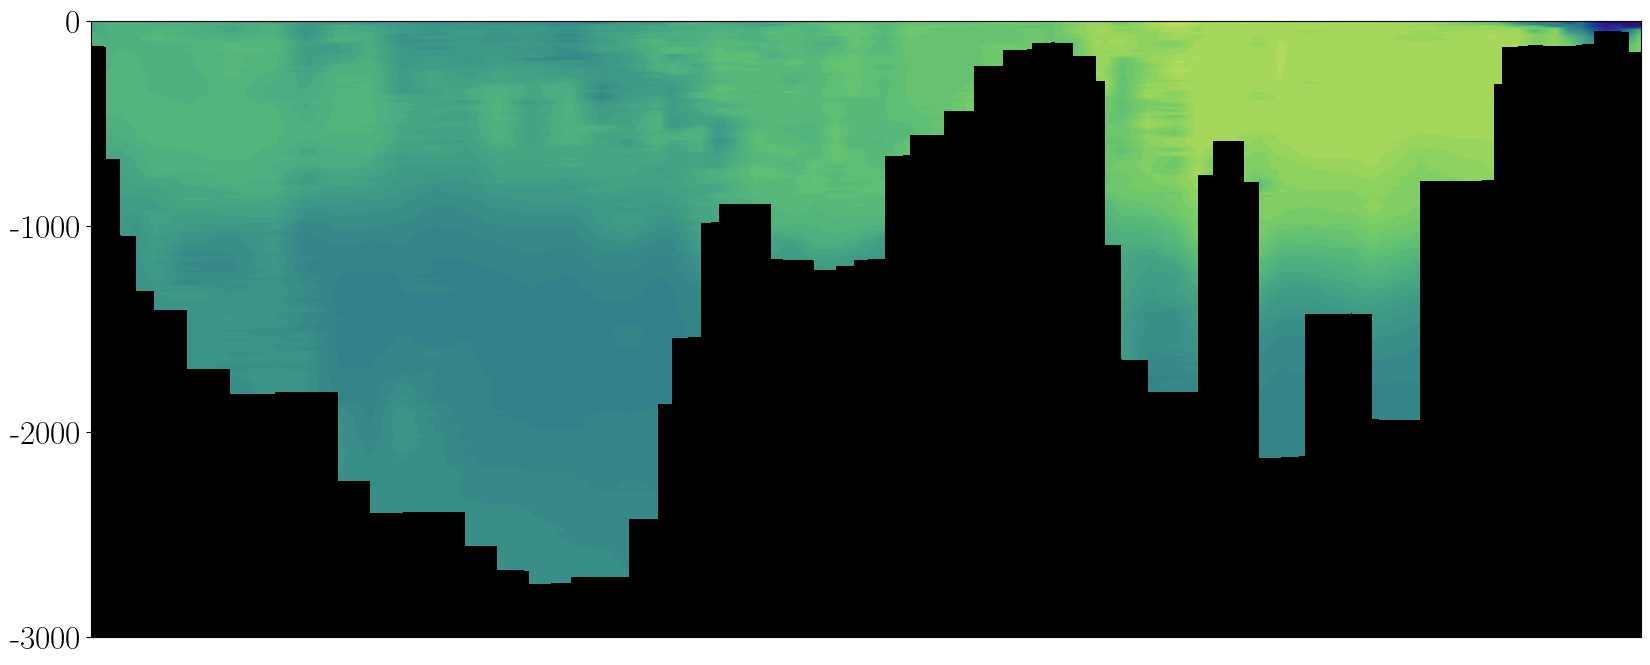

In [25]:
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)

levels_salt_ellet = np.linspace(34.5,35.5,50)

c0=ax1.contourf(od_surv_ellet._ds.station_dist, (ds_ellet.N_LEVELS), (ds_ellet.ctd_salinity[1:65].transpose()), levels_salt_ellet, cmap=cmocean.cm.haline, extend='both' )

ax1.invert_yaxis()

ax1.set_xticks([])
ax1.set_yticks([0,500, 1000, 1500])
ax1.set_yticklabels(['0','-1000','-2000','-3000'])
ax1.set_facecolor('black')
#ax1.set_title('ELLET line (Summer 2016)', pad=30)
ax1.set_ylabel(None)

In [26]:
od_surv_ellet._ds = od_surv_ellet._ds.where(od_surv_ellet._ds.SALT>34)

In [27]:
od_surv_ellet._ds.station_dist[51]

<xarray.DataArray 'station_dist' ()>
array(1157.94895661)
Coordinates:
    lat           float32 57.25
    lon           float32 -10.35
    station       int64 51
    station_dist  float64 1.158e+03
Attributes:
    long_name:  Distance from first station
    units:      km

Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 52.5 s, sys: 5.97 s, total: 58.5 s
Wall time: 21.5 s


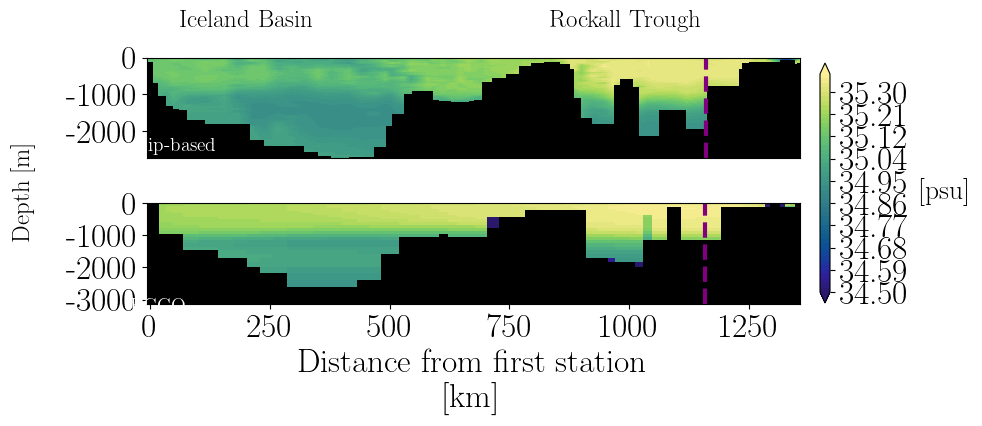

In [28]:
%%time
import numpy as np
from cartopy.crs import PlateCarree
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Create subplots
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)

levels_salt_ellet = np.linspace(34.5,ds_ellet.ctd_salinity.max(),50)

c0=ax1.contourf(od_surv_ellet._ds.station_dist, (ds_ellet.N_LEVELS),ds_ellet.ctd_salinity[1:65].transpose(),
                levels_salt_ellet, cmap=cmocean.cm.haline, extend='both' )

ax1.invert_yaxis()

ax1.set_xticks([])
ax1.set_yticks([0,500, 1000, 1500])
ax1.set_yticklabels(['0','-1000','-2000','-3000'])
ax1.set_facecolor('black')
#ax1.set_title('ELLET line (Summer 2016)', pad=30)
ax1.set_ylabel(None)

ax2 = od_surv_ellet.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':'2016-06'},
    levels=levels_salt_ellet,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    ax=ax2)
    
ax1.vlines([1157], 0, 1, transform=ax1.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)
ax2.vlines([1157], 0, 1, transform=ax2.get_xaxis_transform(),color='purple',linestyle='dashed', lw=3)
    
ax2.patch.set_facecolor('black')
ax2.set_ylabel(None)

ax2.set_yticks([0,-1000,-2000,-3000])
ax2.set_yticklabels(['0','-1000','-2000','-3000'])

plt.figtext(0.92,0.58, '[psu]', fontsize=20)

plt.figtext(0.13,0.3, 'ECCO', color='w', fontsize=14)
plt.figtext(0.13,0.7, 'ship-based', color='w',fontsize=14)
plt.figtext(0.55,1.01, 'Rockall Trough', color='k',fontsize=18)
plt.figtext(0.18,1.01, 'Iceland Basin', color='k',fontsize=18)

fig.supylabel(r'Depth [m]', x=0.01, y=0.6, fontsize=18)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.32, 0.01, 0.6])
fig.colorbar(c0, cax=cbar_ax, format='%1.2f')

plt.savefig('figs/Fig_3b.pdf', format='pdf', bbox_inches='tight', dpi=300)  